<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span><ul class="toc-item"><li><span><a href="#-Naive-Bayes-Classifier-from-Scratch" data-toc-modified-id="-Naive-Bayes-Classifier-from-Scratch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span> Naive Bayes Classifier from Scratch</a></span><ul class="toc-item"><li><span><a href="#-Adelie-vs.-All" data-toc-modified-id="-Adelie-vs.-All-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span> Adelie vs. All</a></span></li><li><span><a href="#-Gentoo-vs.-All" data-toc-modified-id="-Gentoo-vs.-All-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span> Gentoo vs. All</a></span></li><li><span><a href="#-Chinstrap-vs.-All" data-toc-modified-id="-Chinstrap-vs.-All-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span> Chinstrap vs. All</a></span></li></ul></li><li><span><a href="#-Naive-Bayes-Classifier-Using-SKLEARN" data-toc-modified-id="-Naive-Bayes-Classifier-Using-SKLEARN-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span> Naive Bayes Classifier Using SKLEARN</a></span><ul class="toc-item"><li><span><a href="#-Adelie-vs.-All" data-toc-modified-id="-Adelie-vs.-All-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span> Adelie vs. All</a></span></li><li><span><a href="#-Gentoo-vs.-All" data-toc-modified-id="-Gentoo-vs.-All-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span> Gentoo vs. All</a></span></li><li><span><a href="#-Chinstrap-vs.-All" data-toc-modified-id="-Chinstrap-vs.-All-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span> Chinstrap vs. All</a></span></li></ul></li></ul></li></ul></div>

# Naive Bayes Classifier

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/fardinabbasi/Bayes_Classifier/main/penguins.csv"
df=pd.read_csv(url)
def preprocess(data):
    df = data.copy()
    value = df.drop(df.columns[0], axis=1, inplace=False)
    label = df[df.columns[0]]
    value = value.apply(lambda col: filling(col))
    value = normalize(value)
    return value, label

def filling(col):
    col = pd.to_numeric(col, errors='coerce').astype('float64')
    return col.fillna(col.mean())

def normalize(value):
    msc = MinMaxScaler()
    return pd.DataFrame(msc.fit_transform(value), columns=value.columns)

<h2> Naive Bayes Classifier from Scratch</h2>

In [3]:
class NaiveBayes():
	def __init__(self, X, y):
		self.value = train_value
		self.label = train_label
		self.classes = np.unique(self.label)
		self.mean = np.zeros((len(self.classes), len(self.value.columns)))
		self.var = np.zeros((len(self.classes), len(self.value.columns)))
		self.prior = np.zeros((len(self.classes)))
	def train(self):
		self.calculate_mean()
		self.calculate_var()
		self.calculate_prior()
	def calculate_mean(self):
		for i,cls in enumerate(self.classes):
			for j,feature in enumerate(self.value.columns):
				self.mean[i][j] = self.value[self.label==cls][feature].mean(axis=0)
	def calculate_var(self):
		for i,cls in enumerate(self.classes):
			for j,feature in enumerate(self.value.columns):
				self.var[i][j] = self.value[self.label==cls][feature].var(axis=0)
	def calculate_prior(self):
		for i ,cls in enumerate(self.classes):
			self.prior[i]=sum(self.label==cls)/len(self.label)
	def predict(self, test_value, test_label):
		df = test_value.copy()
		df['y_pred'] = test_value.apply(lambda row: self.posterior(np.array(row)), axis=1)
		df = pd.concat([df, test_label], axis=1)
		return df
	def posterior(self,x):
		prob=[]
		for i,cls in enumerate(self.classes):
			post=np.sum(self.prior[i]*self.likelihood(i,x))
			prob.append(post)
		max_idx=np.argmax(prob)
		return self.classes[max_idx]
	def likelihood(self,cls_idx,x):
		mean,var=self.mean[cls_idx],self.var[cls_idx]
		prob=(np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi*var))
		return prob

<h3> Adelie vs. All</h3>

              precision    recall  f1-score   support

      Adelie       0.84      0.86      0.85        50
       Other       0.87      0.85      0.86        53

    accuracy                           0.85       103
   macro avg       0.85      0.85      0.85       103
weighted avg       0.85      0.85      0.85       103



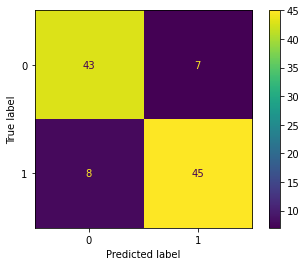

In [14]:
df_adelie = df.copy()
df_adelie['species'] = df['species'].replace(['Gentoo', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_adelie)
train_value, test_value, train_label, test_label = train_test_split(value, label,shuffle=True, test_size=0.3, random_state=42)
data = NaiveBayes(train_value, train_label)
data.train()
result = data.predict(test_value, test_label)

matrix=confusion_matrix(result['species'], result['y_pred'])
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

print(classification_report(result['species'],result['y_pred']))

<h3> Gentoo vs. All</h3>

              precision    recall  f1-score   support

      Gentoo       0.97      0.94      0.96        35
       Other       0.97      0.99      0.98        68

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103



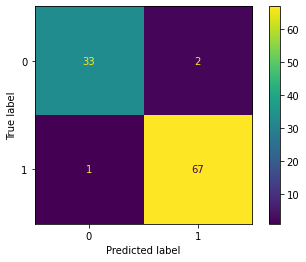

In [16]:
df_gentoo = df.copy()
df_gentoo['species'] = df['species'].replace(['Adelie', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_gentoo)
train_value, test_value, train_label, test_label = train_test_split(value, label, test_size=0.3,shuffle=True, random_state=42)
data = NaiveBayes(train_value, train_label)
data.train()
result = data.predict(test_value, test_label)

matrix=confusion_matrix(result['species'], result['y_pred'])
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

print(classification_report(result['species'],result['y_pred']))

<h3> Chinstrap vs. All</h3>

              precision    recall  f1-score   support

   Chinstrap       0.00      0.00      0.00        18
       Other       0.83      1.00      0.90        85

    accuracy                           0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103



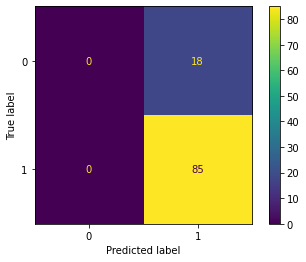

In [21]:
df_chinstrap = df.copy()
df_chinstrap['species'] = df['species'].replace(['Adelie', 'Gentoo'], 'Other', inplace=False)
value, label = preprocess(df_chinstrap)
train_value, test_value, train_label, test_label = train_test_split(value, label, test_size=0.3, random_state=42)
data = NaiveBayes(train_value, train_label)
data.train()
result = data.predict(test_value, test_label)

matrix=confusion_matrix(result['species'], result['y_pred'])
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

print(classification_report(result['species'],result['y_pred'],zero_division=0))

<h2> Naive Bayes Classifier Using SKLEARN</h2>

<h3> Adelie vs. All</h3>

              precision    recall  f1-score   support

      Adelie       0.94      0.88      0.91        50
       Other       0.89      0.94      0.92        53

    accuracy                           0.91       103
   macro avg       0.91      0.91      0.91       103
weighted avg       0.91      0.91      0.91       103



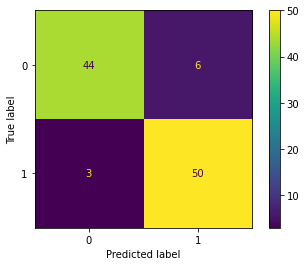

In [23]:
df_adelie = df.copy()
df_adelie['species'] = df['species'].replace(['Gentoo', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_adelie)
train_value, test_value, train_label, test_label = train_test_split(value, label,shuffle=True, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(train_value, train_label).predict(test_value)
matrix=confusion_matrix(test_label,y_pred)

disp=ConfusionMatrixDisplay(matrix)
disp.plot()

print(classification_report(test_label,y_pred))

<h3> Gentoo vs. All</h3>

              precision    recall  f1-score   support

      Gentoo       1.00      0.97      0.99        35
       Other       0.99      1.00      0.99        68

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



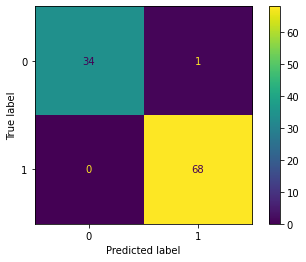

In [24]:
df_gentoo = df.copy()
df_gentoo['species'] = df['species'].replace(['Adelie', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_gentoo)
train_value, test_value, train_label, test_label = train_test_split(value, label, test_size=0.3,shuffle=True, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(train_value, train_label).predict(test_value)
matrix=confusion_matrix(test_label,y_pred)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

print(classification_report(test_label,y_pred))

<h3> Chinstrap vs. All</h3>

              precision    recall  f1-score   support

   Chinstrap       0.93      0.78      0.85        18
       Other       0.95      0.99      0.97        85

    accuracy                           0.95       103
   macro avg       0.94      0.88      0.91       103
weighted avg       0.95      0.95      0.95       103



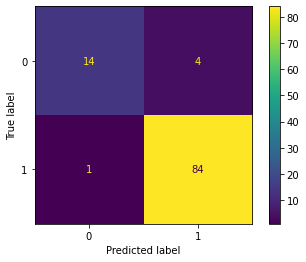

In [25]:
df_chinstrap = df.copy()
df_chinstrap['species'] = df['species'].replace(['Adelie', 'Gentoo'], 'Other', inplace=False)
value, label = preprocess(df_chinstrap)
train_value, test_value, train_label, test_label = train_test_split(value, label,shuffle=True, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(train_value, train_label).predict(test_value)
matrix=confusion_matrix(test_label,y_pred)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

print(classification_report(test_label,y_pred))